## Assignment 3: $k$ Nearest Neighbor

`! git clone https://github.com/ds3001f25/knn_assignment.git`

**Do two questions in total: "Q1+Q2" or "Q1+Q3"**


FYI, I did Q1+Q2 because they're next to each other (lol)

### Setup

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# I assume I can use this because the alternative would just be
# stealing the algo from the ipynb and that doesn't seem right
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

### Q1 Stuff

**Q1.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting? 
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

1. With regression we have the goal of trying to predict a value from a usually continuous range (often numerical), while with classification we have the goal of trying to categorize an observation into a predefined set of categories.
2. A confusion table shows the classification spread of different categories when doing classification. That is, it will show each of the classes and how many observations were correctly/incorrectly classified and where.
3. The SSE, sum of squared errors, tells us roughly how far off the predicted value from a model was from the ground truth when doing regression.
4. Overfitting is where the model is too complex for the data and rather than learning patterns, it begins memorizing the data and poorly generalizing. Underfitting is where the model is too simple for the data and does not learn patterns well enough, leading to poor training error.
5. Splitting the data into training and test sets ends up improving model performance by telling us how well the model is generalizing to new, unesen data - thereby giving the opportunity to fine tune (with a validation set) and thus helping with under/overfitting. Choosing $k$ by evaluating accuracy or SSE on the test set obviously improves model performance because then we begin fine tuning this hyperparam to make the model predict the necessary patterns better. Notably though, we wouldn't want to actually fine tune hyperparams on the test set (only on the validation) because that's like cheating and we don't get a super accurate estimate of if the model generalizes well or not.
6. Reporting just the class label is nice because then you just get the label, and thus makes it nice for say pipelines where all we care about is making sure that we can tie the observation to a predicted label. The weakness of just getting the label is literally - you're just getting the label. No other information (including how confident the model is that the label is correct) is retrieved, which hurts understandability. Getting the probability distribution over class labels becomes a little bit more interesting because you get the probabilities for a given observation and their labels, and then you get a better analysis and understanding of how your model is performing. The issue with doing so is that sometimes this is not necessary and we only care about whether or not we can classify a label.

### Q2 Stuff

**Q2.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$ NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

#### Q2.1

In [4]:
cars_df = pd.read_csv('./data/USA_cars_datasets.csv')

In [5]:
modified_cars_df = cars_df.copy()
modified_cars_df = modified_cars_df[['price', 'year', 'mileage']]

In [6]:
modified_cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   price    2499 non-null   int64
 1   year     2499 non-null   int64
 2   mileage  2499 non-null   int64
dtypes: int64(3)
memory usage: 58.7 KB


In [7]:
modified_cars_df.shape

(2499, 3)

In [8]:
modified_cars_df.head()

,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


So to answer the questions, there are no nulls and the dimensions are 2499 records with 3 columns!

#### Q2.2

In [9]:
# i literally STOLE this word for word from the KNN ipynb lol :)
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

In [10]:
X = modified_cars_df[['year', 'mileage']]
y = modified_cars_df['price']
X_scaled = X.apply(maxmin)

In [11]:
X_scaled

,year,mileage
0,0.744681,0.269287
1,0.808511,0.187194
2,0.957447,0.038892
3,0.872340,0.063016
4,0.957447,0.006537
...,...,...
2494,0.978723,0.023193
2495,0.957447,0.033944
2496,0.957447,0.031037
2497,0.957447,0.031983


Looks pretty scaled to me!

#### Q2.3

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=251130)

In [13]:
X_train.head()

,year,mileage
2028,0.893617,0.018793
127,0.957447,0.015821
344,0.787234,0.135001
289,0.978723,0.010006
912,0.978723,0.034742


In [14]:
y_train.head()

2028    27990
127     53000
344         0
289      6530
912     20800
Name: price, dtype: int64

LGTM!

#### Q2.4

Note that for these, I decided to increase the axes scales for all of them to get a better idea of how good the different k-values were.

In [15]:
# scaling both with the standard scaler dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

FOR K=3:
MSE: 143267052.97311112

FOR K=10:
MSE: 122167000.46478

FOR K=25:
MSE: 120726455.5730336

FOR K=50:
MSE: 119875111.0332344

FOR K=100:
MSE: 120403088.44394821

FOR K=300:
MSE: 121599253.90183832



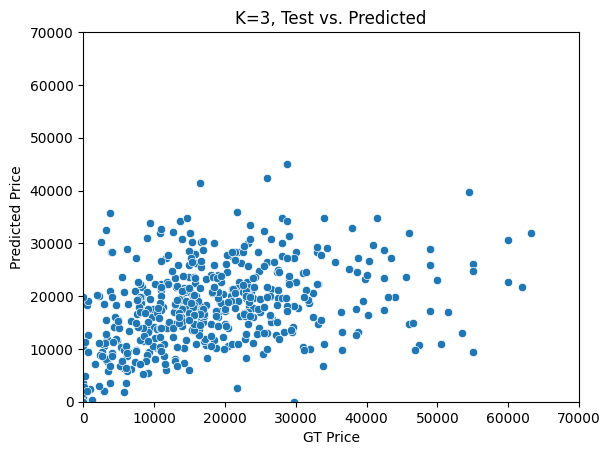

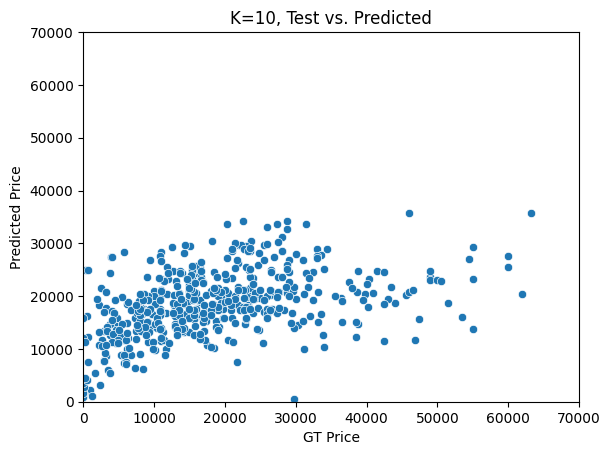

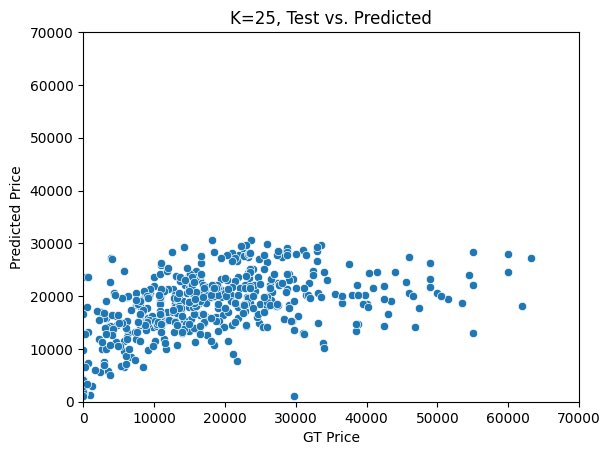

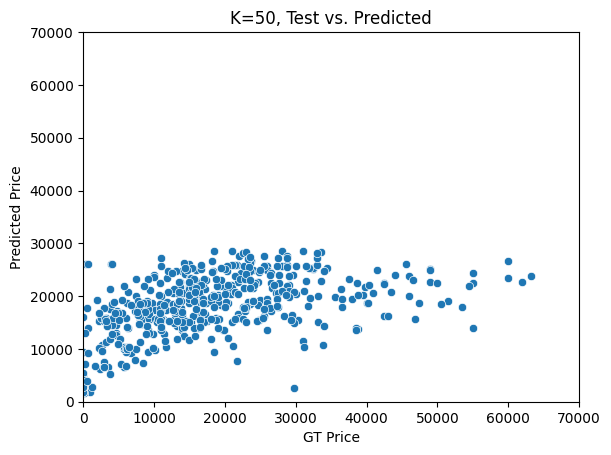

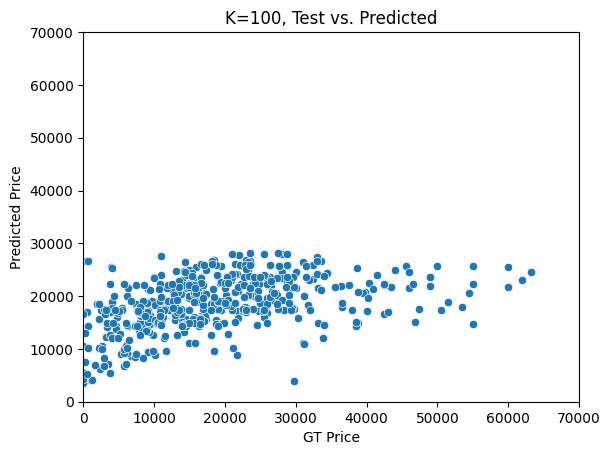

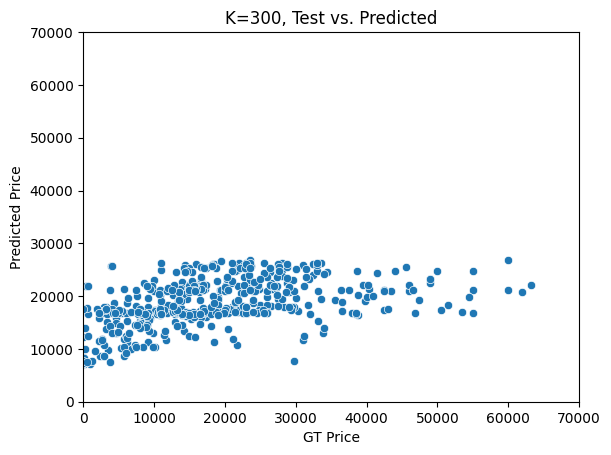

In [21]:
all_mses = {}
for k in [3,10,25,50,100,300]:
    model = KNeighborsRegressor(n_neighbors=k)
    fitted_model = model.fit(X_train_scaled, y_train)
    y_hat = fitted_model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_hat)
    all_mses[k] = mse
    print(f"FOR K={k}:\nMSE: {mse}\n")
    fig, ax = plt.subplots()
    ax.set_xlim(0, 70000)
    ax.set_ylim(0, 70000)
    k_plot = sns.scatterplot(x=y_test, y=y_hat, ax=ax).set(title=f"K={k}, Test vs. Predicted", xlabel="GT Price", ylabel="Predicted Price")

In [ ]:
all_mses

{3: 143267052.97311112,
 10: 122167000.46478,
 25: 120726455.5730336,
 50: 119875111.0332344,
 100: 120403088.44394821,
 300: 121599253.90183832}

So among the 6 different k values given, it seems like k=50 had the lowest MSE (despite being super duper high). The trend seems to be that initially there's some overfitting going on with the lower end of like k=3 which makes sense, and then we start to improve our MSE as we increase k. Then, as we go to k=100, the MSE increases again, suggesting perhaps we're underfitting now by taking into account too many datapoints that are irrelevant noise. 

#### Q2.5

So from 2.4, I identified that k=50 was the best of the bunch. But just like we did in the lecture notes, I'll make an elbow plot - let's do a k=1 all the way to k=100, and figure out which has the lowest MSE!

In [27]:
# I almost, ENTIRELY stole this code from the notebook :)
k_bar = 100
MSE = []

for k in range(k_bar):
    model = KNeighborsRegressor(n_neighbors=k+1)
    fitted_model = model.fit(X_train_scaled, y_train)
    y_hat = fitted_model.predict(X_test_scaled)
    MSE.append(mean_squared_error(y_test, y_hat))

MSE_min = np.min(MSE)
min_index = np.where(MSE==MSE_min)
k_star = min_index[0]+1
print(f"Lowest K: {k_star}")

Lowest K: [68]


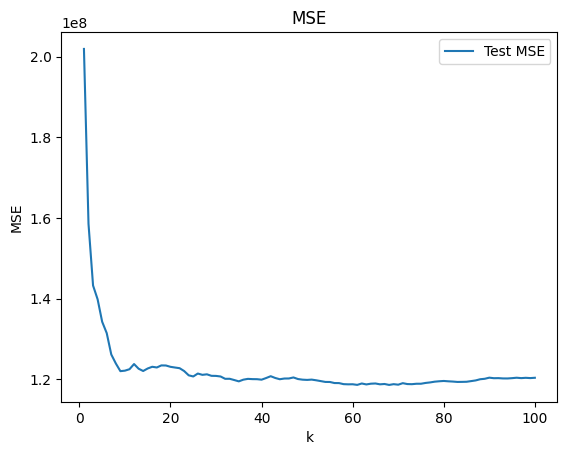

In [28]:
plt.plot(np.arange(1,k_bar+1),MSE,label='Test MSE') 
plt.xlabel("k")
plt.ylabel("MSE")
plt.legend(loc='upper right')
plt.title('MSE')
plt.show()

So, looks like the optimal k is actually at k=68!

#### Q2.6

### Q3 Stuff (I didn't do this one)

**Q3.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings. 
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.